# Кластеризация методом K-средних и DBSCAN

## Mounting a Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Datasets/customers.xlsx')

In [ ]:
data.head()

,Unnamed: 0,name_host,name_customer,gender,age,product,color,price,count,mark
0,0,РАО «Гришин»,Людмила,male,27,рубашка,Розовый,1882,2.0,5.0
1,1,ЗАО «Дементьева Стрелкова»,Радим,f,56,костюм,Индиго,7279,3.0,1.0
2,2,ОАО «Быков Семенов»,Ангелина,male,55,свитер,Сине-фиолетовый,912,1.0,3.0
3,3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2.0,4.0
4,4,НМЖК,Глафира,male,50,NaN,Бледно-зеленый,7492,1.0,3.0


In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data.head()

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,male,27,рубашка,Розовый,1882,2.0,5.0
1,ЗАО «Дементьева Стрелкова»,Радим,f,56,костюм,Индиго,7279,3.0,1.0
2,ОАО «Быков Семенов»,Ангелина,male,55,свитер,Сине-фиолетовый,912,1.0,3.0
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2.0,4.0
4,НМЖК,Глафира,male,50,NaN,Бледно-зеленый,7492,1.0,3.0


# Описание набора данных

Вариант 8. Набор данных о покупках в маркетплейсе (файл - customers.xls).

## Описание данных:

name_host - фирма продавец

name_customer - имя покупателя

gender - пол покупателя

age - возраст покупателя

product - название товара

color - цвет товара

price - стоимость товара

count - количество товара

mark - оценка товара


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_host      2998 non-null   object 
 1   name_customer  2999 non-null   object 
 2   gender         3000 non-null   object 
 3   age            3000 non-null   object 
 4   product        2742 non-null   object 
 5   color          2999 non-null   object 
 6   price          3000 non-null   int64  
 7   count          2999 non-null   float64
 8   mark           2999 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 211.1+ KB


Видим, что в наборе данных присутствуют пропуски

In [ ]:
data.describe()

,price,count,mark
count,3000.000000,2999.000000,2999.000000
mean,7787.209000,2.517172,2.502167
std,4452.440241,54.767569,1.740287
min,-8366.000000,-2.000000,-3.000000
25%,3865.500000,1.000000,1.000000
50%,7591.500000,2.000000,3.000000
75%,11814.250000,3.000000,4.000000
max,15397.000000,3000.000000,5.000000


In [ ]:
data.describe(include='object')

,name_host,name_customer,gender,age,product,color
count,2998,2999,3000,3000,2742,2999
unique,2763,398,4,56,10,54
top,ЗАО «Белова-Сысоев»,Алевтина,female,23,юбка,Темно-синий
freq,11,15,1807,78,300,71


In [ ]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [ ]:
data['mark'].unique()

array([ 5.,  1.,  3.,  4.,  2.,  0., nan, -3.])

In [ ]:
data = data[(data['price'] > 0) & (data['count'] > 0) & (data['mark'] >= 0)]

In [ ]:
data = data.dropna()

In [ ]:
data['age'] = data['age'].astype(int)
data['count'] = data['count'].astype(int)
data['mark'] = data['mark'].astype(int)

In [ ]:
# Вычисляем моду для столбцов "count" и "mark"
count_mode = data['count'].mode()[0]
mark_mode = data['mark'].mode()[0]

# Заполняем пропуски модой
data['count'] = data['count'].fillna(count_mode)
data['mark'] = data['mark'].fillna(mark_mode)

In [ ]:
data = data[data['age'] < 100]

In [ ]:
data.head()

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,male,27,рубашка,Розовый,1882,2,5
1,ЗАО «Дементьева Стрелкова»,Радим,f,56,костюм,Индиго,7279,3,1
2,ОАО «Быков Семенов»,Ангелина,male,55,свитер,Сине-фиолетовый,912,1,3
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2,4
5,ИП «Быкова Волков»,Афанасий,female,48,шарф,Малиновый,4350,1,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2053 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_host      2053 non-null   object
 1   name_customer  2053 non-null   object
 2   gender         2053 non-null   object
 3   age            2053 non-null   int64 
 4   product        2053 non-null   object
 5   color          2053 non-null   object
 6   price          2053 non-null   int64 
 7   count          2053 non-null   int64 
 8   mark           2053 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 160.4+ KB


Видим, что в данных пропусков больше нет

In [ ]:
data.describe()

,age,price,count,mark
count,2053.000000,2053.000000,2053.000000,2053.000000
mean,42.163176,7788.012177,3.482708,2.492937
std,14.491584,4414.680305,66.173758,1.728269
min,18.000000,352.000000,1.000000,0.000000
25%,30.000000,3891.000000,1.000000,1.000000
50%,42.000000,7583.000000,2.000000,3.000000
75%,55.000000,11754.000000,3.000000,4.000000
max,67.000000,15390.000000,3000.000000,5.000000


In [ ]:
data.describe(include='object')

,name_host,name_customer,gender,product,color
count,2053,2053,2053,2053,2053
unique,1933,396,3,10,54
top,ЗАО «Белова-Сысоев»,Лонгин,female,шапка,Ярко-розовый
freq,10,12,1228,221,48


In [ ]:
data['gender'].unique()

array(['male', 'f', 'female'], dtype=object)

In [ ]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
data['gender'] = data['name_customer'].apply(lambda x: morph.parse(x)[0].tag.gender)

In [ ]:
data['gender'].unique()

array(['femn', 'masc', None, 'neut'], dtype=object)

In [ ]:
data = data.query('gender != None and gender != "neut"')

In [ ]:
data['gender'] = data['gender'].replace({'femn': 'female', 'masc': 'male'})

In [ ]:
data = data.dropna()

In [ ]:
data[data['gender'] == 'male']

,name_host,name_customer,gender,age,product,color,price,count,mark
1,ЗАО «Дементьева Стрелкова»,Радим,male,56,костюм,Индиго,7279,3,1
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2,4
5,ИП «Быкова Волков»,Афанасий,male,48,шарф,Малиновый,4350,1,5
6,"ИП «Степанова, Одинцова и Бобылев»",Давыд,male,61,платье,Шоколадный,1484,1,1
7,ИП «Быкова Волков»,Ермолай,male,19,шапка,Фиолетовый,1133,30,2
...,...,...,...,...,...,...,...,...,...
2991,Квадра,Лаврентий,male,31,штаны,Розовато-лавандовый,1504,3,0
2992,Соловьева Лтд,Владилен,male,64,шарф,Ярко-розовый,11166,2,2
2993,"ИП «Петрова, Русаков и Крылова»",Борислав,male,44,куртка,Темный хаки,1346,1,2
2994,"РАО «Носова, Тетерина и Тарасов»",Александр,male,18,платье,Античный Белый,13864,1,4


In [ ]:
data[data['gender'] == 'female']

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,female,27,рубашка,Розовый,1882,2,5
2,ОАО «Быков Семенов»,Ангелина,female,55,свитер,Сине-фиолетовый,912,1,3
12,ИП «Быкова Волков»,Прасковья,female,27,платье,Шоколадный,5377,1,2
32,ЗАО «Панфилова-Семенов»,Бажен,female,59,юбка,Каштановый,14646,3,1
33,"ЗАО «Елисеева, Филатова и Савина»",Раиса,female,21,куртка,Индиго,4061,1,0
...,...,...,...,...,...,...,...,...,...
2972,РАО «Евдокимов»,Милен,female,29,джинсы,Коричневый,3183,2,0
2975,ООО «Владимирова-Шилов»,Евфросиния,female,29,шапка,Светло-синий,11933,2,5
2976,ЗАО «Матвеева-Кузьмин»,Вера,female,58,юбка,Желто-зеленый,13642,2,4
2995,Сидорова Лимитед,Валентина,female,32,штаны,Темно-серый,9574,3,0


In [ ]:
data.head()

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,female,27,рубашка,Розовый,1882,2,5
1,ЗАО «Дементьева Стрелкова»,Радим,male,56,костюм,Индиго,7279,3,1
2,ОАО «Быков Семенов»,Ангелина,female,55,свитер,Сине-фиолетовый,912,1,3
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2,4
5,ИП «Быкова Волков»,Афанасий,male,48,шарф,Малиновый,4350,1,5


In [ ]:
data.shape

(2038, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_host      2038 non-null   object
 1   name_customer  2038 non-null   object
 2   gender         2038 non-null   object
 3   age            2038 non-null   int64 
 4   product        2038 non-null   object
 5   color          2038 non-null   object
 6   price          2038 non-null   int64 
 7   count          2038 non-null   int64 
 8   mark           2038 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 159.2+ KB


In [ ]:
data.describe()

,age,price,count,mark
count,2038.000000,2038.000000,2038.000000,2038.000000
mean,42.225711,7786.115800,3.493131,2.489205
std,14.464423,4415.861676,66.416817,1.725557
min,18.000000,352.000000,1.000000,0.000000
25%,30.000000,3890.250000,1.000000,1.000000
50%,42.000000,7575.500000,2.000000,2.000000
75%,55.000000,11757.000000,3.000000,4.000000
max,67.000000,15390.000000,3000.000000,5.000000


In [ ]:
data.describe(include='object')

,name_host,name_customer,gender,product,color
count,2038,2038,2038,2038,2038
unique,1919,393,2,10,54
top,ЗАО «Белова-Сысоев»,Лонгин,male,шапка,Ярко-розовый
freq,10,12,1601,219,48


# Exploratory Data Analysis

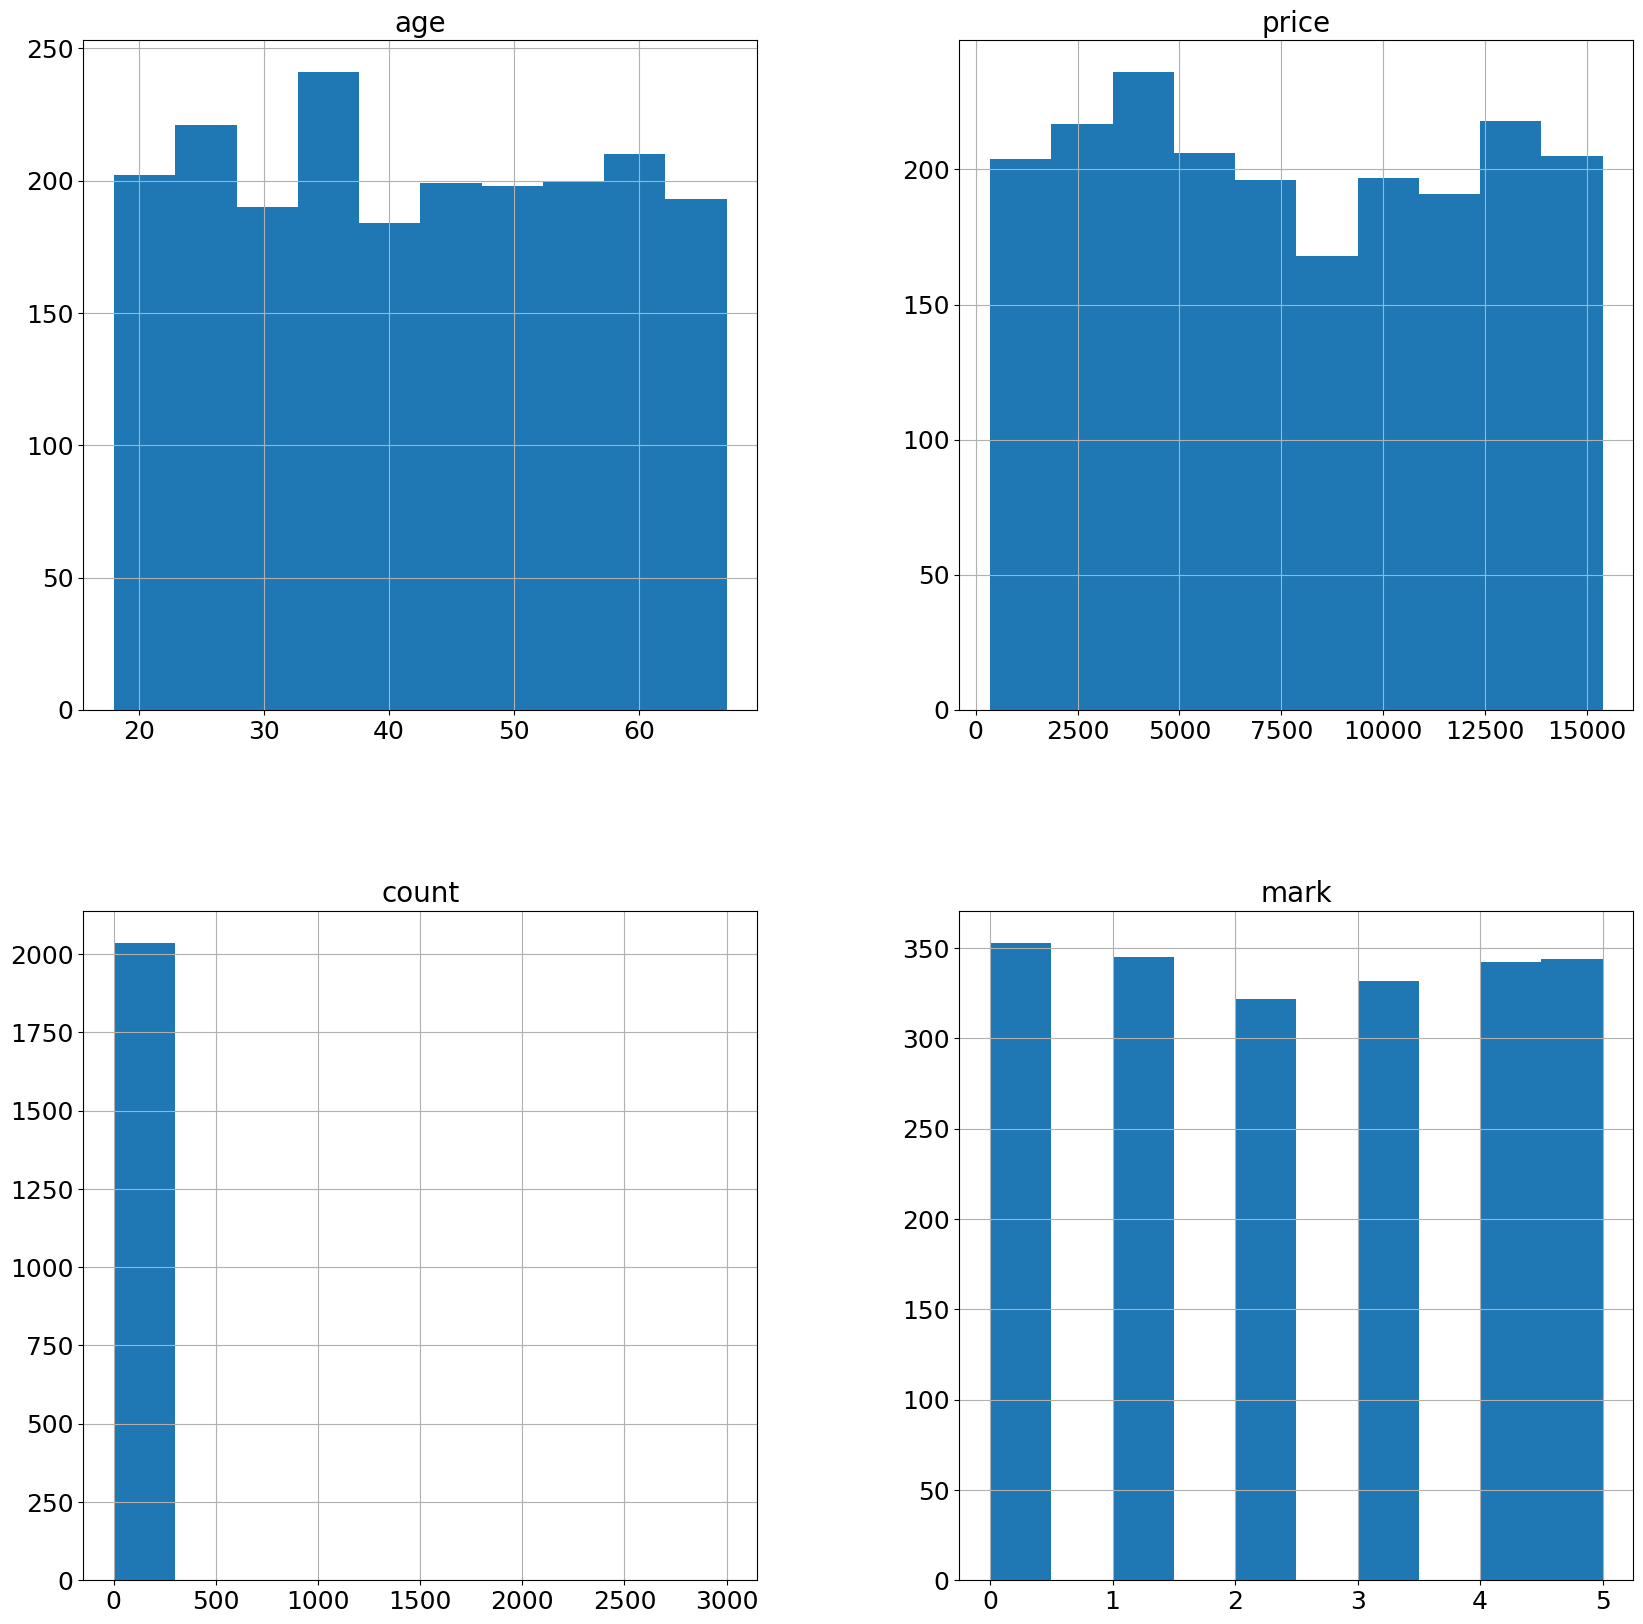

In [ ]:
data.hist(figsize=(20, 20));

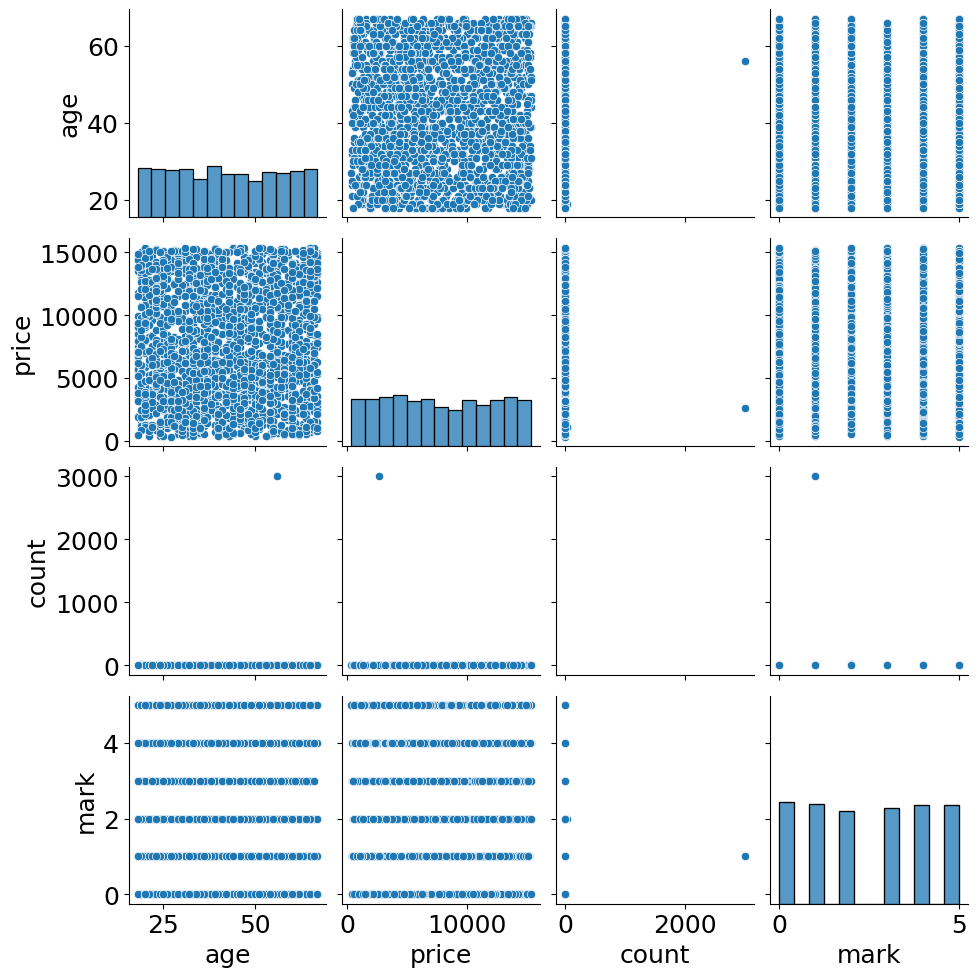

In [ ]:
sns.pairplot(data[['age', 'price',	'count',	'mark']])

In [ ]:
X = data.drop('mark', axis=1)

## Функция для обнаружения аномалий в данных

In [ ]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:

    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)

    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)

    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

def detect_anomalies(data, method='std', threshold=3, del_anomaly=False):
    def outlier_std(data, col, threshold=3):
        mean = data[col].mean()
        std = data[col].std()
        up_bound = mean + threshold * std
        low_bound = mean - threshold * std
        anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
        return anomalies, up_bound, low_bound

    def outlier_iqr(data, col, threshold=1.5):
        IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
        up_bound = data[col].quantile(0.75) + (IQR * threshold)
        low_bound = data[col].quantile(0.25) - (IQR * threshold)
        anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
        return anomalies, up_bound, low_bound

    method_dict = {'std': outlier_std, 'iqr': outlier_iqr}
    data_features = data.select_dtypes(include=['int64', 'float64'])

    if method not in method_dict:
        if method not in ['euclidean', 'cityblock', 'dbscan', 'oneclass_svm', 'isolation_forest']:
            raise ValueError("Invalid method. Choose either 'std', 'iqr', 'euclidean', 'cityblock', 'dbscan', 'oneclass_svm' or 'isolation_forest'.")

    outliers_indices = []
    if method in ['euclidean', 'cityblock']:
        scaled_data = RobustScaler().fit_transform(data_features)
        model = DistanceOutliers(metric=method, percentile=(100 - threshold))
        model.fit(scaled_data)
        anomalies = model.predict(scaled_data)
        outliers_indices.extend(list(np.where(anomalies == 1)[0]))
        outliers_indices = list(set(data.index) - set(outliers_indices))
    elif method == 'dbscan':
        scaled_data = RobustScaler().fit_transform(data_features)
        outlier_percentage = 1.
        num_clusters = []
        anomaly_percentage = []
        eps = 0.05
        eps_history = [eps]
        while outlier_percentage>0.1:
            model = DBSCAN(eps=eps).fit(scaled_data)
            labels = model.labels_
            num_clusters.append(len(np.unique(labels))-1)
            labels = np.array([1 if label == -1 else 0 for label in labels])
            outlier_percentage = sum(labels==1) / len(labels)
            eps += 0.05
            eps_history.append(eps)
            anomaly_percentage.append(outlier_percentage)
        outliers_indices.extend(list(np.where(labels == 1)[0]))

    elif method == 'oneclass_svm':
        original_indices = data.index  # Сохраняем исходные индексы
        scaled_data = RobustScaler().fit_transform(data_features)
        one_class_svm = OneClassSVM(nu=0.05, gamma='auto')
        one_class_svm.fit(scaled_data)
        svm_outliers = one_class_svm.predict(scaled_data)
        svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])
        outliers_indices.extend(list(original_indices[np.where(svm_outliers == 1)[0]]))

    elif method == 'isolation_forest':
        original_indices = data.index  # Сохраняем исходные индексы
        scaled_data = RobustScaler().fit_transform(data_features)
        isolation_forest = IsolationForest(n_estimators=100, contamination=0.05,
                                           max_features=1.0, bootstrap=True)
        isolation_forest.fit(scaled_data)
        isolation_outliers = isolation_forest.predict(scaled_data)
        isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])
        outliers_indices.extend(list(original_indices[np.where(isolation_outliers == 1)[0]]))  # Используем исходные индексы для аномалий


    else:
        for column in data_features.columns:
            anomalies, _, _ = method_dict[method](data_features, column, threshold=threshold)
            outliers_indices.extend(list(anomalies[anomalies].index))
        outliers_indices = list(set(outliers_indices))

    if del_anomaly:
        invalid_indices = set(outliers_indices) - set(data.index)
        valid_indices = [i for i in outliers_indices if i not in invalid_indices]
        clean_data = data.drop(valid_indices)
        return clean_data
    else:
        return outliers_indices

In [ ]:
# Выявление аномалий и удаление их из набора данных (метод 'std')
clean_data_std = detect_anomalies(X, method='std', threshold=3, del_anomaly=True)
print("Clean data (std):\n", clean_data_std, clean_data_std.shape)

# Выявление аномалий и получение их индексов (метод 'std')
anomaly_indices_std = detect_anomalies(X, method='std', threshold=3, del_anomaly=False)
print("Anomaly indices (std):", anomaly_indices_std)

# Выявление аномалий и удаление их из набора данных (метод 'iqr')
clean_data_iqr = detect_anomalies(X, method='iqr', threshold=1.5, del_anomaly=True)
print("Clean data (iqr):\n", clean_data_iqr, clean_data_iqr.shape)

# Выявление аномалий и получение их индексов (метод 'iqr')
anomaly_indices_iqr = detect_anomalies(X, method='iqr', threshold=1.5, del_anomaly=False)
print("Anomaly indices (iqr):", anomaly_indices_iqr)

# Выявление аномалий и удаление их из набора данных (метод 'euclidean')
clean_data_euclidean_del = detect_anomalies(X, method='euclidean', threshold=95, del_anomaly=True)
print("Clean data (euclidean, del_anomaly=True):\n", clean_data_euclidean_del, clean_data_euclidean_del.shape)

# Выявление аномалий и получение их индексов (метод 'euclidean')
anomaly_indices_euclidean = detect_anomalies(X, method='euclidean', threshold=95, del_anomaly=False)
print("Anomaly indices (euclidean, del_anomaly=False):", anomaly_indices_euclidean)

# Выявление аномалий и удаление их из набора данных (метод 'cityblock')
clean_data_cityblock_del = detect_anomalies(X, method='cityblock', threshold=95, del_anomaly=True)
print("Clean data (cityblock, del_anomaly=True):\n", clean_data_cityblock_del, clean_data_cityblock_del.shape)

# Выявление аномалий и получение их индексов (метод 'cityblock')
anomaly_indices_cityblock = detect_anomalies(X, method='cityblock', threshold=95, del_anomaly=False)
print("Anomaly indices (cityblock, del_anomaly=False):", anomaly_indices_cityblock)

# Выявление аномалий и удаление их из набора данных (метод 'dbscan')
clean_data_dbscan_del = detect_anomalies(X, method='dbscan', del_anomaly=True)
print("Clean data (dbscan, del_anomaly=True):\n", clean_data_dbscan_del, clean_data_dbscan_del.shape)

# Выявление аномалий и получение их индексов (метод 'dbscan')
anomaly_indices_dbscan = detect_anomalies(X, method='dbscan', del_anomaly=False)
print("Anomaly indices (dbscan, del_anomaly=False):", anomaly_indices_dbscan)

# Выявление аномалий и удаление их из набора данных (метод 'oneclass_svm')
clean_data_oneclass_svm_del = detect_anomalies(X, method='oneclass_svm', del_anomaly=True)
print("Clean data (oneclass_svm, del_anomaly=True):\n", clean_data_oneclass_svm_del, clean_data_oneclass_svm_del.shape)

# Выявление аномалий и получение их индексов (метод 'oneclass_svm')
anomaly_indices_oneclass_svm = detect_anomalies(X, method='oneclass_svm', del_anomaly=False)
print("Anomaly indices (oneclass_svm, del_anomaly=False):", anomaly_indices_oneclass_svm)

# Выявление аномалий и удаление их из набора данных (метод 'isolation_forest')
clean_data_isolation_forest_del = detect_anomalies(X, method='isolation_forest', del_anomaly=True)
print("Clean data (isolation_forest, del_anomaly=True):\n", clean_data_isolation_forest_del, clean_data_isolation_forest_del.shape)

# Выявление аномалий и получение их индексов (метод 'isolation_forest')
anomaly_indices_isolation_forest = detect_anomalies(X, method='isolation_forest', del_anomaly=False)
print("Anomaly indices (isolation_forest, del_anomaly=False):", anomaly_indices_isolation_forest)

Clean data (std):
                              name_host name_customer  gender  age  product  \
0                         РАО «Гришин»       Людмила  female   27  рубашка   
1           ЗАО «Дементьева Стрелкова»         Радим    male   56   костюм   
2                  ОАО «Быков Семенов»      Ангелина  female   55   свитер   
3                ООО «Кулаков Русаков»        Демьян    male   54   куртка   
5                   ИП «Быкова Волков»      Афанасий    male   48     шарф   
...                                ...           ...     ...  ...      ...   
2993   ИП «Петрова, Русаков и Крылова»      Борислав    male   44   куртка   
2994  РАО «Носова, Тетерина и Тарасов»     Александр    male   18   платье   
2995                  Сидорова Лимитед     Валентина  female   32    штаны   
2998                     Кабанов Групп     Валентина  female   43   джинсы   
2999                        АО «Рябов»     Владислав    male   65     шарф   

                color  price  count  
0     

In [ ]:
anomaly_counts = {
    'std': len(anomaly_indices_std),
    'iqr': len(anomaly_indices_iqr),
    'distance-based, euclidean': len(anomaly_indices_euclidean),
    'distance-based, cityblock': len(anomaly_indices_cityblock),
    'dbscan': len(anomaly_indices_dbscan),
    'oneclass_svm': len(anomaly_indices_oneclass_svm),
    'isolation_forest': len(anomaly_indices_isolation_forest)
}

avg_anomalies = sum(anomaly_counts.values()) / len(anomaly_counts)
closest_anomalies = min(anomaly_counts, key=lambda x: abs(anomaly_counts[x] - avg_anomalies))
print(f"Количество аномалий, близкое к среднему по всем методам, выявлено методом '{closest_anomalies}': {anomaly_counts[closest_anomalies]}")

Количество аномалий, близкое к среднему по всем методам, выявлено методом 'oneclass_svm': 102


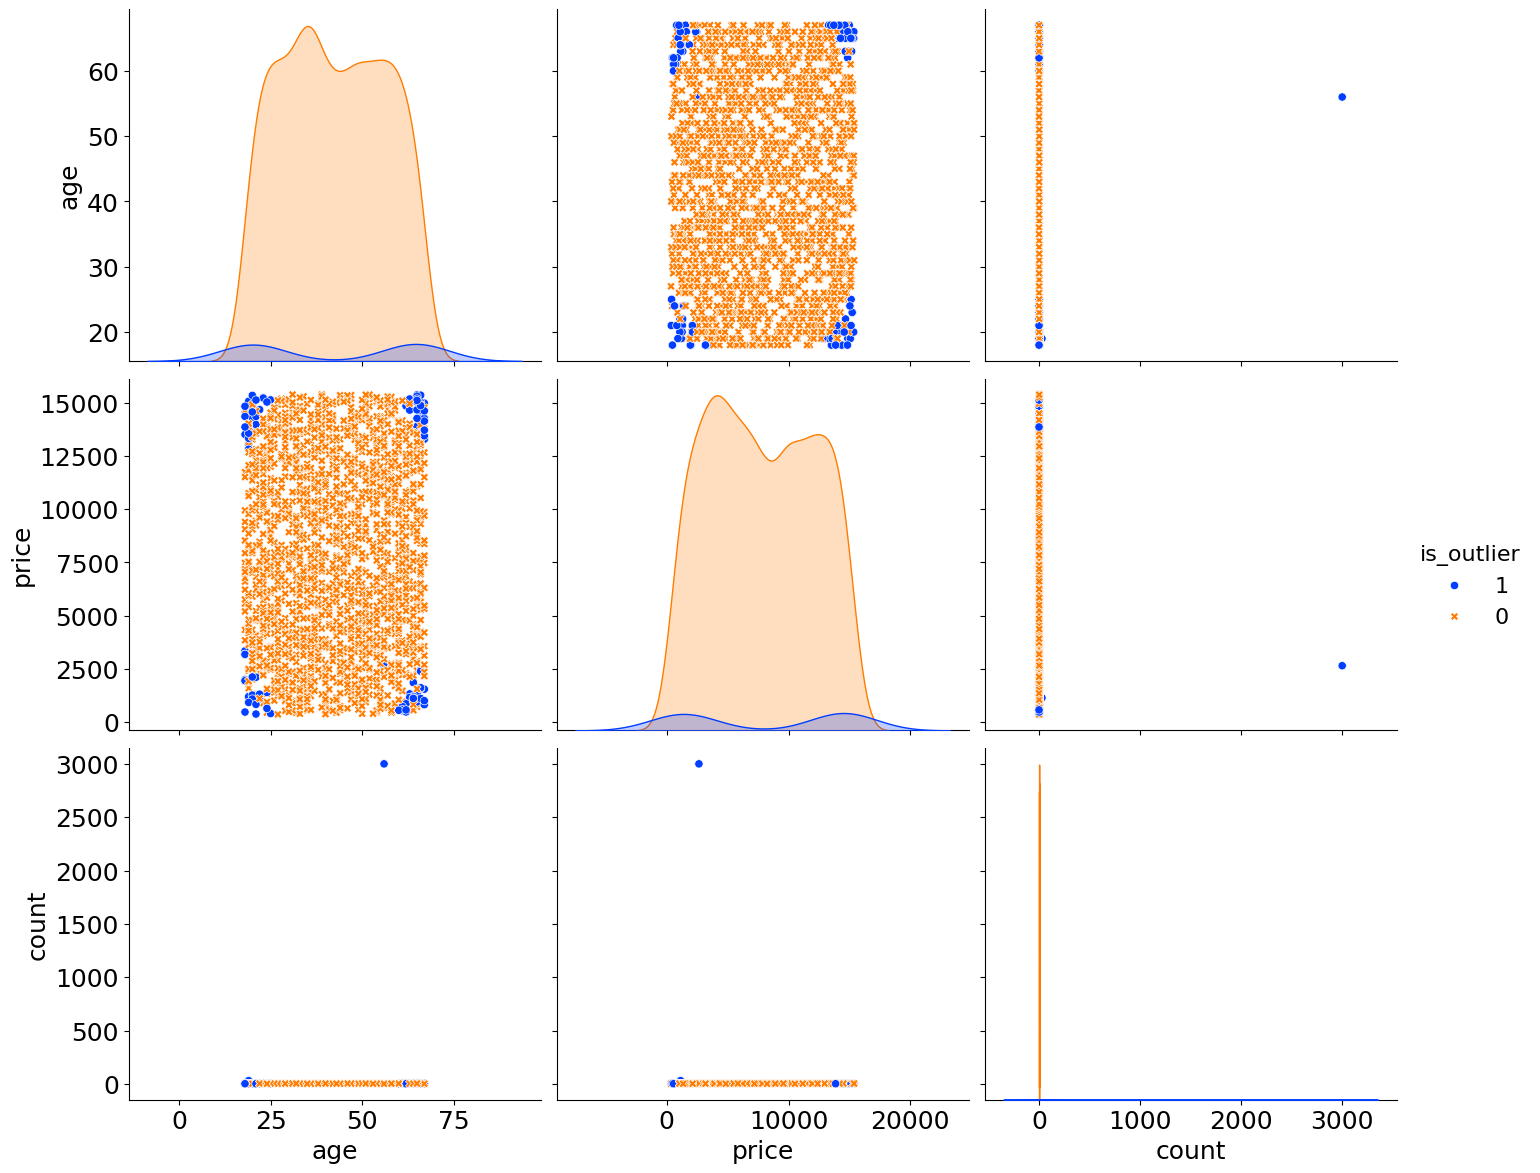

In [ ]:
# Map method names to lists of anomaly indices
anomaly_indices = {
    'std': anomaly_indices_std,
    'iqr': anomaly_indices_iqr,
    'distance-based, euclidean': anomaly_indices_euclidean,
    'distance-based, cityblock': anomaly_indices_cityblock,
    'dbscan': anomaly_indices_dbscan,
    'oneclass_svm': anomaly_indices_oneclass_svm,
    'isolation_forest': anomaly_indices_isolation_forest
}

# Get the list of indices corresponding to the outliers identified by the method with the closest to average detected anomalies
outlier_indices = np.intersect1d(anomaly_indices[closest_anomalies], X.select_dtypes(include=['int64', 'float64']).index)

# Extract the outliers from the original dataset
closest_outliers = X.select_dtypes(include=['int64', 'float64']).loc[outlier_indices]

labeled_data = X.select_dtypes(include=['int64', 'float64']).copy()
labeled_data['is_outlier'] = np.where(labeled_data.index.isin(outlier_indices), 1, 0)

sns.pairplot(data=labeled_data, vars=X.select_dtypes(include=['int64', 'float64']).columns,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'], palette='bright', height=4, aspect=1.2)
plt.show()

## Оценка значимости признаков

In [ ]:
data.shape

(2038, 9)

In [ ]:
df = clean_data_oneclass_svm_del
df.shape

(1936, 8)

In [ ]:
df

,name_host,name_customer,gender,age,product,color,price,count
0,РАО «Гришин»,Людмила,female,27,рубашка,Розовый,1882,2
1,ЗАО «Дементьева Стрелкова»,Радим,male,56,костюм,Индиго,7279,3
2,ОАО «Быков Семенов»,Ангелина,female,55,свитер,Сине-фиолетовый,912,1
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2
5,ИП «Быкова Волков»,Афанасий,male,48,шарф,Малиновый,4350,1
...,...,...,...,...,...,...,...,...
2992,Соловьева Лтд,Владилен,male,64,шарф,Ярко-розовый,11166,2
2993,"ИП «Петрова, Русаков и Крылова»",Борислав,male,44,куртка,Темный хаки,1346,1
2995,Сидорова Лимитед,Валентина,female,32,штаны,Темно-серый,9574,3
2998,Кабанов Групп,Валентина,female,43,джинсы,Темный хаки,12390,2


Добавляем колонку с целевой переменной в датафрейм и удаляем возникающие дубликаты

In [ ]:
common_columns = [col for col in data.columns if col != 'mark' and col in df.columns]
data_deduped = data.drop_duplicates(subset=common_columns)
df = df.merge(data_deduped[common_columns + ['mark']], on=common_columns, how='inner')
print("df shape after merging and deduplication:", df.shape)


df shape after merging and deduplication: (1936, 9)


In [ ]:
df

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,female,27,рубашка,Розовый,1882,2,5
1,ЗАО «Дементьева Стрелкова»,Радим,male,56,костюм,Индиго,7279,3,1
2,ОАО «Быков Семенов»,Ангелина,female,55,свитер,Сине-фиолетовый,912,1,3
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2,4
4,ИП «Быкова Волков»,Афанасий,male,48,шарф,Малиновый,4350,1,5
...,...,...,...,...,...,...,...,...,...
1931,Соловьева Лтд,Владилен,male,64,шарф,Ярко-розовый,11166,2,2
1932,"ИП «Петрова, Русаков и Крылова»",Борислав,male,44,куртка,Темный хаки,1346,1,2
1933,Сидорова Лимитед,Валентина,female,32,штаны,Темно-серый,9574,3,0
1934,Кабанов Групп,Валентина,female,43,джинсы,Темный хаки,12390,2,5


Выделение целевой переменной и признаков

In [ ]:
target = df["mark"]
df = df.drop("mark", axis=1)
df.head()

,name_host,name_customer,gender,age,product,color,price,count
0,РАО «Гришин»,Людмила,female,27,рубашка,Розовый,1882,2
1,ЗАО «Дементьева Стрелкова»,Радим,male,56,костюм,Индиго,7279,3
2,ОАО «Быков Семенов»,Ангелина,female,55,свитер,Сине-фиолетовый,912,1
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2
4,ИП «Быкова Волков»,Афанасий,male,48,шарф,Малиновый,4350,1


In [ ]:
target

0       5
1       1
2       3
3       4
4       5
       ..
1931    2
1932    2
1933    0
1934    5
1935    5
Name: mark, Length: 1936, dtype: int64

In [ ]:
# Установим размеры шрифтов для графиков
import matplotlib.pyplot as plt

plt.rc('font', size=16)          # размеры текста по умолчанию
plt.rc('axes', titlesize=20)     # размер шрифта заголовка осей
plt.rc('axes', labelsize=18)     # размер шрифта названия осей
plt.rc('xtick', labelsize=18)    # размер шрифта меток по оси x
plt.rc('ytick', labelsize=18)    # размер шрифта меток по оси y
plt.rc('legend', fontsize=16)    # размер шрифта легенды
plt.rc('figure', titlesize=20)   # размер шрифта заголовка всего графика

Кодируем категориальные признаки

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Выделим категориальные столбцы
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Создаем LabelEncoder
encoder = LabelEncoder()

# Применить LabelEncoder к категориальным столбцам
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

df.head()

,name_host,name_customer,gender,age,product,color,price,count
0,1501,212,0,27,4,23,1882,2
1,400,292,1,56,1,12,7279,3
2,1101,27,0,55,5,32,912,1
3,1357,113,1,54,2,31,12928,2
4,566,50,1,48,7,18,4350,1


In [ ]:
numerical_cols = df.select_dtypes(exclude=["object"]).columns.tolist()
len(numerical_cols) == df.shape[1]

True

Видим, что все колонки датафрейма теперь численные

In [ ]:
df.isna().sum()

name_host        0
name_customer    0
gender           0
age              0
product          0
color            0
price            0
count            0
dtype: int64

Пропусков в данных нет, все признаки численные, и мы собираемся использовать ансамбли деревьев, поэтому нормализацию признаков проводить не будем.

In [ ]:
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    average_precision_score,
)
import numpy as np
import pandas as pd
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

def get_feature_importance(X, y, model_name, n_features=1, size=0.33):
    if model_name == 'xgb':
        model = XGBClassifier()
    elif model_name == 'rf':
        model = RandomForestClassifier()
    elif model_name == 'ada':
        model = AdaBoostClassifier()
    elif model_name == 'dt':
        model = DecisionTreeClassifier()
    elif model_name == 'lr':
        model = LogisticRegression()
    elif model_name == 'stacking':
        est_list = [('dt{}'.format(i+1), DecisionTreeClassifier()) for i in range(10)]
        model = StackingClassifier(estimators=est_list, final_estimator=DecisionTreeClassifier())
    elif model_name == 'voting':
        est_list = [('dt{}'.format(i+1), DecisionTreeClassifier()) for i in range(10)]
        model = VotingClassifier(estimators=est_list, voting="soft")
    else:
        raise ValueError("Invalid model name")

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=size,
        random_state=42,
        stratify=y,
    )

    model.fit(X_train, y_train)

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    elif model_name in ['stacking', 'voting']:
        estimator_importances = np.zeros((len(model.estimators), X.shape[1]))
        for idx, est in enumerate(model.estimators):
            if hasattr(est[1], 'feature_importances_'):
                estimator_importances[idx] = est[1].feature_importances_
        importances = np.mean(estimator_importances, axis=0)
    else:
        raise ValueError("Model does not have feature importances")

    sorted_idx = np.argsort(importances)[-n_features:]
    return list(sorted_idx)

In [ ]:
def get_feature_importance_names(df, target, n_features=5, size = 0.33):
    feature_importance_dict = {}

    xgb_features = get_feature_importance(df, target, 'xgb', n_features, size)
    feature_importance_dict["XGB"] = [df.columns[idx] for idx in xgb_features]

    rf_features = get_feature_importance(df, target, 'rf', n_features, size)
    feature_importance_dict["RF"] = [df.columns[idx] for idx in rf_features]

    ada_features = get_feature_importance(df, target, 'ada', n_features, size)
    feature_importance_dict["AdaBoost"] = [df.columns[idx] for idx in ada_features]

    dt_features = get_feature_importance(df, target, 'dt', n_features, size)
    feature_importance_dict["DecisionTree"] = [df.columns[idx] for idx in dt_features]

    lr_features = get_feature_importance(df, target, 'lr', n_features, size)
    feature_importance_dict["LogisticRegression"] = [df.columns[idx] for idx in lr_features]

    stacking_importance = get_feature_importance(df, target, "stacking", n_features, size)
    feature_importance_dict["Stacking"] = [df.columns[idx] for idx in stacking_importance]

    voting_importance = get_feature_importance(df, target, "voting", n_features, size)
    feature_importance_dict["Voting"] = [df.columns[idx] for idx in voting_importance]

    return pd.DataFrame(feature_importance_dict)

feature_importance_df = get_feature_importance_names(df, target, n_features=5, size = 0.33)

In [ ]:
feature_importance_df

,XGB,RF,AdaBoost,DecisionTree,LogisticRegression,Stacking,Voting
0,name_host,age,age,color,name_customer,age,age
1,name_customer,color,color,age,count,product,product
2,price,name_customer,name_host,name_host,age,color,color
3,product,name_host,price,price,product,price,price
4,gender,price,name_customer,name_customer,color,count,count


In [ ]:
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    average_precision_score,
)
import numpy as np
import pandas as pd
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
def get_feature_importance(X, y, model_name, n_features=1, size=0.33, fi_type='feature_importances'):
    if model_name == 'xgb':
        model = XGBClassifier()
    elif model_name == 'rf':
        model = RandomForestClassifier()
    elif model_name == 'ada':
        model = AdaBoostClassifier()
    elif model_name == 'dt':
        model = DecisionTreeClassifier()
    elif model_name == 'lr':
        model = LogisticRegression()
    elif model_name == 'stacking':
        est_list = [('dt{}'.format(i+1), DecisionTreeClassifier()) for i in range(10)]
        model = StackingClassifier(estimators=est_list, final_estimator=DecisionTreeClassifier())
    elif model_name == 'voting':
        est_list = [('dt{}'.format(i+1), DecisionTreeClassifier()) for i in range(10)]
        model = VotingClassifier(estimators=est_list, voting="soft")
    else:
        raise ValueError("Invalid model name")

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=size,
        random_state=42,
        stratify=y,
    )

    model.fit(X_train, y_train)

    if fi_type == 'feature_importances':
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_[0])
        elif model_name in ['stacking', 'voting']:
            estimator_importances = np.zeros((len(model.estimators), X.shape[1]))
            for idx, est in enumerate(model.estimators):
                if hasattr(est[1], 'feature_importances_'):
                    estimator_importances[idx] = est[1].feature_importances_
            importances = np.mean(estimator_importances, axis=0)
        else:
            raise ValueError("Model does not have feature importances")
    elif fi_type == 'shap':
        X_train_sample = X_train.sample(n=50, random_state=42)  # Выборка 50 объектов из X_train
        if (model_name != 'lr') and (model_name != 'ada') and (model_name != 'stacking') and (model_name != 'voting'):
            explainer = shap.TreeExplainer(model)
            fi = explainer.shap_values(X_train_sample)  # Использование выборки X_train_sample
        else:
            kernel_explainer = shap.KernelExplainer(model.predict_proba, X_train_sample)  # Использование выборки X_train_sample
            fi = kernel_explainer.shap_values(X_train_sample)  # Использование выборки X_train_sample
        importances = np.mean(np.abs(fi), axis=0)
    else:
        raise ValueError("Invalid feature importance type")

    sorted_idx = np.argsort(importances)[-n_features:]
    return list(sorted_idx)

In [ ]:
def get_feature_importance_names(df, target, n_features=5, size=0.33):
    feature_importance_dict = {}

    xgb_features = get_feature_importance(df, target, 'xgb', n_features, size, fi_type='feature_importances')
    feature_importance_dict["XGB"] = [df.columns[idx] for idx in xgb_features]

    rf_features = get_feature_importance(df, target, 'rf', n_features, size, fi_type='feature_importances')
    feature_importance_dict["RF"] = [df.columns[idx] for idx in rf_features]

    ada_features = get_feature_importance(df, target, 'ada', n_features, size, fi_type='feature_importances')
    feature_importance_dict["AdaBoost"] = [df.columns[idx] for idx in ada_features]

    dt_features = get_feature_importance(df, target, 'dt', n_features, size, fi_type='feature_importances')
    feature_importance_dict["DecisionTree"] = [df.columns[idx] for idx in dt_features]

    lr_features = get_feature_importance(df, target, 'lr', n_features, size, fi_type='feature_importances')
    feature_importance_dict["LogisticRegression"] = [df.columns[idx] for idx in lr_features]

    stacking_importance = get_feature_importance(df, target, "stacking", n_features, size, fi_type='feature_importances')
    feature_importance_dict["Stacking"] = [df.columns[idx] for idx in stacking_importance]

    voting_importance = get_feature_importance(df, target, "voting", n_features, size, fi_type='feature_importances')
    feature_importance_dict["Voting"] = [df.columns[idx] for idx in voting_importance]

    xgb_shap_features = get_feature_importance(df, target, 'xgb', n_features, size, fi_type='shap')
    feature_importance_dict["XGB SHAP"] = [df.columns[idx] for idx in xgb_shap_features]

    rf_shap_features = get_feature_importance(df, target, 'rf', n_features, size, fi_type='shap')
    feature_importance_dict["RF SHAP"] = [df.columns[idx] for idx in rf_shap_features]

    dt_shap_features = get_feature_importance(df, target, 'dt', n_features, size, fi_type='shap')
    feature_importance_dict["DecisionTree SHAP"] = [df.columns[idx] for idx in dt_shap_features]

    lr_shap_features = get_feature_importance(df, target, 'lr', n_features, size, fi_type='shap')
    feature_importance_dict["LogisticRegression SHAP"] = [df.columns[idx] for idx in lr_shap_features]

    return pd.DataFrame(feature_importance_dict)

feature_importance_df = get_feature_importance_names(df, target, n_features=5, size=0.33)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

# Get the SHAP feature importance values
shap_values = {}
for col in feature_importance_df.columns:
    if "SHAP" in col:
        first_row_values = feature_importance_df.loc[0, col]
        shap_values[col] = first_row_values

# Create a dataframe with the SHAP values
shap_df = pd.DataFrame(shap_values)

# Display the dataframe
shap_df

,XGB SHAP,RF SHAP,DecisionTree SHAP,LogisticRegression SHAP
0,name_host,name_customer,gender,name_host
1,color,gender,age,color
2,gender,age,name_host,name_customer
3,name_customer,color,name_customer,product
4,product,name_host,color,age
5,age,product,product,gender


In [ ]:
from IPython.display import HTML

# Фильтруем колонки, где есть слово "SHAP"
filtered_columns = [column for column in feature_importance_df.columns if 'SHAP' not in column]

# Создаем новый DataFrame без колонок, содержащих слово "SHAP"
filtered_df = feature_importance_df[filtered_columns]

# Создаем HTML-таблицу для отображения DataFrame
html = filtered_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#f2f2f2')]}]).to_html()

# Отображаем таблицу
HTML(html)


,XGB,RF,AdaBoost,DecisionTree,LogisticRegression,Stacking,Voting
0,name_host,age,age,color,name_customer,age,age
1,name_customer,color,color,age,count,product,product
2,price,name_customer,name_host,name_host,age,color,color
3,product,name_host,price,price,product,price,price
4,gender,price,name_customer,name_customer,color,count,count


In [ ]:
# Объединяем данные фреймы
merged_df = pd.concat([filtered_df, shap_df], axis=1)

# Создаем HTML-таблицу для отображения DataFrame
html = merged_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#f2f2f2')]}]).to_html()

# Отображаем таблицу
HTML(html)

,XGB,RF,AdaBoost,DecisionTree,LogisticRegression,Stacking,Voting,XGB SHAP,RF SHAP,DecisionTree SHAP,LogisticRegression SHAP
0,name_host,age,age,color,name_customer,age,age,name_host,name_customer,gender,name_host
1,name_customer,color,color,age,count,product,product,color,gender,age,color
2,price,name_customer,name_host,name_host,age,color,color,gender,age,name_host,name_customer
3,product,name_host,price,price,product,price,price,name_customer,color,name_customer,product
4,gender,price,name_customer,name_customer,color,count,count,product,name_host,color,age
5,nan,nan,nan,nan,nan,nan,nan,age,product,product,gender


## PCA для снижения размерности

In [ ]:
df

,name_host,name_customer,gender,age,product,color,price,count
0,1501,212,0,27,4,23,1882,2
1,400,292,1,56,1,12,7279,3
2,1101,27,0,55,5,32,912,1
3,1357,113,1,54,2,31,12928,2
4,566,50,1,48,7,18,4350,1
...,...,...,...,...,...,...,...,...
1931,1732,83,1,64,7,53,11166,2
1932,677,56,1,44,2,45,1346,1
1933,1720,62,0,32,8,42,9574,3
1934,741,62,0,43,0,45,12390,2


In [ ]:
target

0       5
1       1
2       3
3       4
4       5
       ..
1931    2
1932    2
1933    0
1934    5
1935    5
Name: mark, Length: 1936, dtype: int64

## Функция для подсчета метрик качества модели многоклассовой классификации

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_classification_metrics(y_true, y_pred, y_pred_proba, model_name, threshold=None):
    """
    Функция для подсчета метрик качества модели классификации.

    Аргументы:
    y_true -- истинные значения целевой переменной
    y_pred -- предсказанные значения целевой переменной
    y_pred_proba -- вероятности предсказаний (для бинарной классификации)
    model_name -- название модели
    threshold -- порог для классификации (по умолчанию None)

    Возвращает словарь с названиями метрик и их значениями.
    """
    metrics = {'Model': model_name}

    if len(np.unique(y_true)) == 2:  # Бинарная классификация
        if threshold is not None:
            y_pred_thresholded = (y_pred_proba[:, 1] >= threshold).astype(int)
            metrics['Accuracy'] = accuracy_score(y_true, y_pred_thresholded)
            metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_proba[:, 1])
            metrics['Precision'] = precision_score(y_true, y_pred_thresholded)
            metrics['Recall'] = recall_score(y_true, y_pred_thresholded)
            metrics['F1 Score'] = f1_score(y_true, y_pred_thresholded)
            metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred_thresholded).tolist()
        else:
            metrics['Accuracy'] = accuracy_score(y_true, y_pred)
            metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_proba[:, 1])
            metrics['Precision'] = precision_score(y_true, y_pred)
            metrics['Recall'] = recall_score(y_true, y_pred)
            metrics['F1 Score'] = f1_score(y_true, y_pred)
            metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()
    else:  # Многоклассовая классификация
        metrics['Accuracy'] = accuracy_score(y_true, y_pred)
        metrics['Precision (Micro)'] = precision_score(y_true, y_pred, average='micro')
        metrics['Recall (Micro)'] = recall_score(y_true, y_pred, average='micro')
        metrics['F1 Score (Micro)'] = f1_score(y_true, y_pred, average='micro')
        metrics['Precision (Macro)'] = precision_score(y_true, y_pred, average='macro')
        metrics['Recall (Macro)'] = recall_score(y_true, y_pred, average='macro')
        metrics['F1 Score (Macro)'] = f1_score(y_true, y_pred, average='macro')

    return metrics

In [ ]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state=42, stratify=target)
# Проверка соотношения классов в обучающем и тестовом наборах
print("Обучающий набор:")
print(y_train.value_counts(normalize=True))
print("\nТестовый набор:")
print(y_test.value_counts(normalize=True))

Обучающий набор:
mark
0    0.171956
1    0.169742
4    0.167528
5    0.166052
3    0.165314
2    0.159410
Name: proportion, dtype: float64

Тестовый набор:
mark
0    0.172117
1    0.168675
4    0.168675
3    0.165232
5    0.165232
2    0.160069
Name: proportion, dtype: float64


In [ ]:
print(X_train[:5], y_train[:5], X_test[:5], y_test[:5])

      name_host  name_customer  gender  age  product  color  price  count
1288       1735             93       1   66        5     44  13129      2
165         337             54       1   44        4      7  15359      2
230         815            106       1   54        3     19   2011      3
173        1548            285       1   50        7     34   3462      3
275          57            300       1   60        9      2   8137      3 1288    0
165     3
230     5
173     4
275     0
Name: mark, dtype: int64       name_host  name_customer  gender  age  product  color  price  count
1794       1222             18       1   60        1     14   2670      3
326         703            144       0   49        2      9   3582      3
1567       1233            104       1   51        5      8   9530      1
1100       1671            211       1   19        2     50   4815      1
743        1113             78       1   28        7     32  13727      2 1794    3
326     0
1567    2
1100   

## Масштабирование данных

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled[:5], y_train[:5], X_test_scaled[:5], y_test[:5])

[[ 1.55042578 -0.90965354  0.4988466   1.70492783  0.1599924   1.09456737
   1.26170066 -0.02567936]
 [-1.08878981 -1.25785023  0.4988466   0.13725668 -0.18411823 -1.28793317
   1.78698749 -0.02567936]
 [-0.18639707 -0.79358798  0.4988466   0.84983448 -0.52822886 -0.5152303
  -1.35719573  1.21701845]
 [ 1.19739766  0.80454552  0.4988466   0.56480336  0.84821366  0.4506483
  -1.01540596  1.21701845]
 [-1.61738807  0.93846732  0.4988466   1.27738115  1.53643491 -1.6098927
   0.08581194  1.21701845]] 1288    0
165     3
230     5
173     4
275     0
Name: mark, dtype: int64 [[ 0.59470946 -1.64345918  0.57933771  1.28297439 -1.28244802 -0.73924951
  -1.17817767  1.25914539]
 [-0.39248107 -0.49798854 -1.72610893  0.47783993 -0.92931897 -1.05692996
  -0.96725082  1.25914539]
 [ 0.61563258 -0.86163001  0.57933771  0.62422801  0.13006819 -1.12046605
   0.40839929 -1.20818504]
 [ 1.44875291  0.11111093  0.57933771 -1.71798132 -0.92931897  1.54804972
  -0.68208327 -1.20818504]
 [ 0.38738043 -1.0

## Обучение модели многоклассовой классификации на исходном наборе данных

In [ ]:
%%time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определение модели
rfc = RandomForestClassifier(n_jobs=-1)

# Задание сетки параметров для перебора
param_grid = {
    'max_features': [5, 10],
    'max_depth': [5, 15],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Создание объекта GridSearchCV с моделью, сеткой параметров и количеством фолдов для кросс-валидации
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Обучение GridSearchCV на обучающих данных
grid_search.fit(X_train_scaled, y_train)

# Вывод наилучших параметров
print("Наилучшие параметры:", grid_search.best_params_)
print(f"Наилучшая точность на кросс-валидации: {grid_search.best_score_}")
cv_best_score_1 = grid_search.best_score_

end_time = time.time()

# Вычисление времени обучения модели
training_time_1 = end_time - start_time

Наилучшие параметры: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 2}
Наилучшая точность на кросс-валидации: 0.1977859778597786
CPU times: user 1min 6s, sys: 1.37 s, total: 1min 8s
Wall time: 1min 14s


In [ ]:
# Получение наилучшей модели
best_rfc = grid_search.best_estimator_

# Предсказание на тестовых данных с использованием наилучшей модели
y_pred = best_rfc.predict(X_test_scaled)
y_pred_proba = best_rfc.predict_proba(X_test_scaled)

In [ ]:
metrics_1 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model №1')
print("Метрики качества модели:")
for metric, value in metrics_1.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model №1
Accuracy: 0.18416523235800344
Precision (Micro): 0.18416523235800344
Recall (Micro): 0.18416523235800344
F1 Score (Micro): 0.18416523235800342
Precision (Macro): 0.17771081072877423
Recall (Macro): 0.1831650939945871
F1 Score (Macro): 0.17588976472723658


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.30      0.25       100
           1       0.21      0.20      0.21        98
           2       0.14      0.19      0.17        93
           3       0.13      0.08      0.10        96
           4       0.21      0.23      0.22        98
           5       0.16      0.08      0.11        96

    accuracy                           0.18       581
   macro avg       0.18      0.18      0.18       581
weighted avg       0.18      0.18      0.18       581



## Реализация метода PCA для признакового пространства

In [ ]:
import numpy as np
from sklearn.decomposition import KernelPCA

n_components = min(40, X_train_scaled.shape[1])
pca = KernelPCA(n_components=n_components, kernel='poly')

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

## Обучение модели многоклассовой классификации на новом признаковом пространстве, полученном в результате применения PCA

In [ ]:
%%time
start_time = time.time()

# Определение модели
rfc = RandomForestClassifier(n_jobs=-1)

# Задание сетки параметров для перебора
param_grid = {
    'max_features': [5, 10],
    'max_depth': [5, 15],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Создание объекта GridSearchCV с моделью, сеткой параметров и количеством фолдов для кросс-валидации
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Обучение GridSearchCV на обучающих данных
grid_search.fit(X_train_pca, y_train)

# Вывод наилучших параметров
print("Наилучшие параметры:", grid_search.best_params_)
print(f"Наилучшая точность на кросс-валидации: {grid_search.best_score_}")
cv_best_score_2 = grid_search.best_score_

end_time = time.time()

# Вычисление времени обучения модели
training_time_2 = end_time - start_time

Наилучшие параметры: {'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 5}
Наилучшая точность на кросс-валидации: 0.19852398523985243
CPU times: user 1min 41s, sys: 1.85 s, total: 1min 43s
Wall time: 1min 12s


In [ ]:
# Получение наилучшей модели
best_rfc = grid_search.best_estimator_

# Предсказание на тестовых данных с использованием наилучшей модели
y_pred = best_rfc.predict(X_test_pca)
y_pred_proba = best_rfc.predict_proba(X_test_pca)

In [ ]:
metrics_2 = calculate_classification_metrics(y_test, y_pred, y_pred_proba, 'Model №2')
print("Метрики качества модели:")
for metric, value in metrics_2.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model №2
Accuracy: 0.13769363166953527
Precision (Micro): 0.13769363166953527
Recall (Micro): 0.13769363166953527
F1 Score (Micro): 0.13769363166953527
Precision (Macro): 0.1378443719835444
Recall (Macro): 0.13724942396313364
F1 Score (Macro): 0.13520261389379237


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.19      0.18       100
           1       0.10      0.08      0.09        98
           2       0.13      0.13      0.13        93
           3       0.18      0.12      0.15        96
           4       0.14      0.20      0.16        98
           5       0.10      0.09      0.10        96

    accuracy                           0.14       581
   macro avg       0.14      0.14      0.14       581
weighted avg       0.14      0.14      0.14       581



## Model Evaluation (сравнение полученных моделей по метрикам качества, а также по времени обучения)

In [ ]:
from IPython.display import display, HTML

model_metrics_1_filtered = {key: value for key, value in metrics_1.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_2_filtered = {key: value for key, value in metrics_2.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

# Создание DataFrame
df_2 = pd.DataFrame({
    "Model №1": model_metrics_1_filtered,
    "Model №2": model_metrics_2_filtered
})

df_2.loc['Cross validation best score'] = [cv_best_score_1, cv_best_score_2]
df_2.loc['Training Time'] = [training_time_1, training_time_2]

# Функция для форматирования значений
def format_values(value):
    if isinstance(value, float):
        return "{:.8f}".format(value)
    else:
        return value

# Применение функции к каждому элементу DataFrame
df_3 = df_2.applymap(format_values)

df_3.loc['Training Time'] = df_3.loc['Training Time'].apply(lambda x: f"<span style='color:red'>{x} (sec)</span>")

# Вывод DataFrame как красивой таблицы
display(HTML(df_3.to_html(escape=False)))

,Model №1,Model №2
Accuracy,0.18416523,0.13769363
Precision (Micro),0.18416523,0.13769363
Recall (Micro),0.18416523,0.13769363
F1 Score (Micro),0.18416523,0.13769363
Precision (Macro),0.17771081,0.13784437
Recall (Macro),0.18316509,0.13724942
F1 Score (Macro),0.17588976,0.13520261
Cross validation best score,0.19778598,0.19852399
Training Time,74.14927030 (sec),72.34065771 (sec)


## Вывод: метрики качества модели RandomForest для решения задачи многоклассовой классификации на кросс-валидации оказались выше после применения метода PCA, чем до применения данного метода. Время на обучение модели RandomForest после преобразования признакового пространства с помощью метода PCA оказалось затрачено больше, чем до применения данного метода.

# Метод t-SNE для снижения размерности

## Функция визуализации набора данных с множеством признаков и одной целевой переменной с использованием метода T-SNE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter

def visualize_tsne(data, target, perplexity, target_label='Target'):
    """
    Визуализирует набор данных с использованием метода t-SNE.

    Параметры:
    - data: DataFrame или 2D массив признаков
    - target: 1D массив целевых переменных
    - perplexity: значение perplexity для t-SNE
    - target_label: метка для цветовой шкалы

    Вывод:
    - двумерная диаграмма рассеяния по обобщенным признакам
    """
    # Стандартизация данных
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Применение метода t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(data_scaled)

    # Построение диаграммы рассеяния
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=target, cmap='viridis', alpha=0.7)
    colorbar = plt.colorbar(scatter)
    colorbar.set_label(target_label)

    # Форматирование цветовой шкалы для отображения больших чисел
    formatter = FuncFormatter(lambda x, pos: f'{x:.0f}')
    colorbar.ax.yaxis.set_major_formatter(formatter)

    plt.title(f'Визуализация метода t-SNE (perplexity={perplexity})')
    plt.xlabel('T-SNE компонента 1')
    plt.ylabel('T-SNE компонента 2')
    plt.show()

In [ ]:
df

,name_host,name_customer,gender,age,product,color,price,count
0,1501,212,0,27,4,23,1882,2
1,400,292,1,56,1,12,7279,3
2,1101,27,0,55,5,32,912,1
3,1357,113,1,54,2,31,12928,2
4,566,50,1,48,7,18,4350,1
...,...,...,...,...,...,...,...,...
1931,1732,83,1,64,7,53,11166,2
1932,677,56,1,44,2,45,1346,1
1933,1720,62,0,32,8,42,9574,3
1934,741,62,0,43,0,45,12390,2


In [ ]:
target

0       5
1       1
2       3
3       4
4       5
       ..
1931    2
1932    2
1933    0
1934    5
1935    5
Name: mark, Length: 1936, dtype: int64

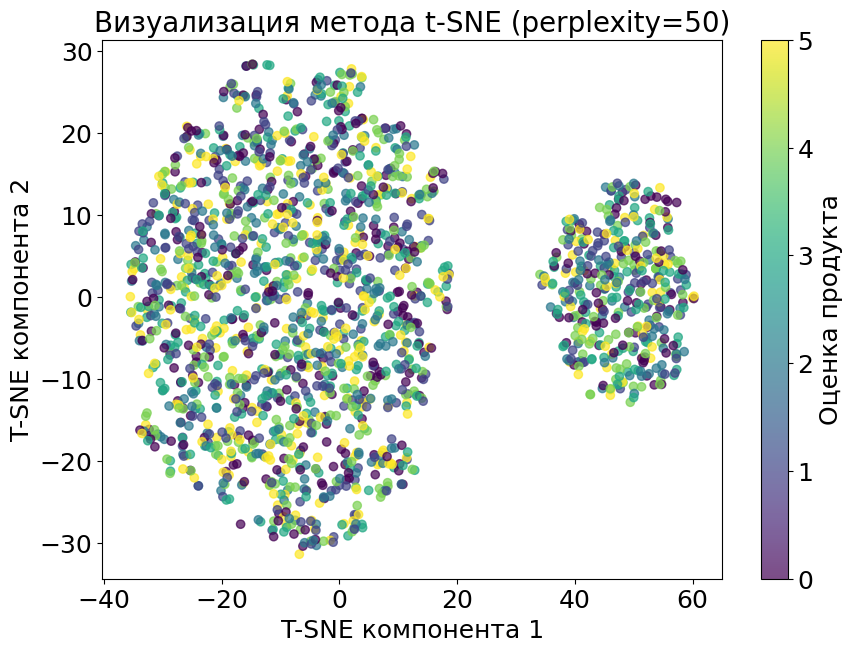

In [ ]:
# Перебор значений perplexity
# perplexity_values = [5, 10, 30, 50, 75, 100, 130]
perplexity_values = [50]
for perplexity in perplexity_values:
    visualize_tsne(df.values, target.values, perplexity=perplexity, target_label='Оценка продукта')

# Кластеризация методом K-средних

In [ ]:
df

,name_host,name_customer,gender,age,product,color,price,count
0,1501,212,0,27,4,23,1882,2
1,400,292,1,56,1,12,7279,3
2,1101,27,0,55,5,32,912,1
3,1357,113,1,54,2,31,12928,2
4,566,50,1,48,7,18,4350,1
...,...,...,...,...,...,...,...,...
1931,1732,83,1,64,7,53,11166,2
1932,677,56,1,44,2,45,1346,1
1933,1720,62,0,32,8,42,9574,3
1934,741,62,0,43,0,45,12390,2


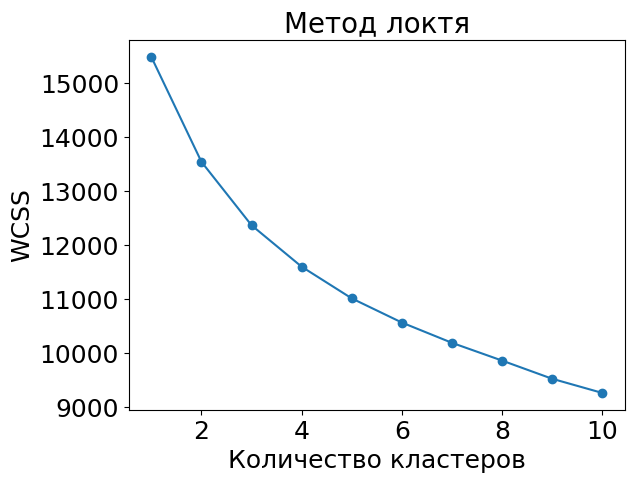

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Нормализация данных
scaler = StandardScaler()
cluster_dataset = scaler.fit_transform(df)

# Метод локтя для определения оптимального количества кластеров
def plot_elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(init="k-means++", n_clusters=i, n_init=12, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Метод локтя')
    plt.xlabel('Количество кластеров')
    plt.ylabel('WCSS')
    plt.show()

# Вызовем метод локтя для визуализации
plot_elbow_method(cluster_dataset)

In [ ]:
cluster_dataset

array([[ 1.11364745,  0.14311227, -1.91150364, ..., -0.23013782,
        -1.37927816, -0.01024483],
       [-0.96953271,  0.86110742,  0.52314836, ..., -0.93501558,
        -0.11504865,  1.22937979],
       [ 0.35681542, -1.51725151, -1.91150364, ...,  0.34658034,
        -1.60649747, -1.24986945],
       ...,
       [ 1.52801298, -1.20312864, -1.91150364, ...,  0.98737831,
         0.42254755,  1.22937979],
       [-0.32433341, -1.20312864, -1.91150364, ...,  1.1796177 ,
         1.0821863 , -0.01024483],
       [-1.41795569, -0.99670503,  0.52314836, ..., -0.10197823,
        -0.45236392,  1.22937979]])

In [ ]:
# Выбираем k=2 на основе метода локтя
k = 2
k_means = KMeans(init="k-means++", n_clusters=k, n_init=12, random_state=42)
k_means.fit(cluster_dataset)
labels = k_means.labels_
print(labels)

[0 1 0 ... 0 0 1]


In [ ]:
# Записываем метки кластеров в исходный DataFrame
df["label_k_means"] = labels
df.head(5)

,name_host,name_customer,gender,age,product,color,price,count,label_k_means
0,1501,212,0,27,4,23,1882,2,0
1,400,292,1,56,1,12,7279,3,1
2,1101,27,0,55,5,32,912,1,0
3,1357,113,1,54,2,31,12928,2,1
4,566,50,1,48,7,18,4350,1,1


In [ ]:
# Применение t-SNE для уменьшения размерности до 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(cluster_dataset)

# Записываем результаты t-SNE в DataFrame для визуализации
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Labels'] = labels

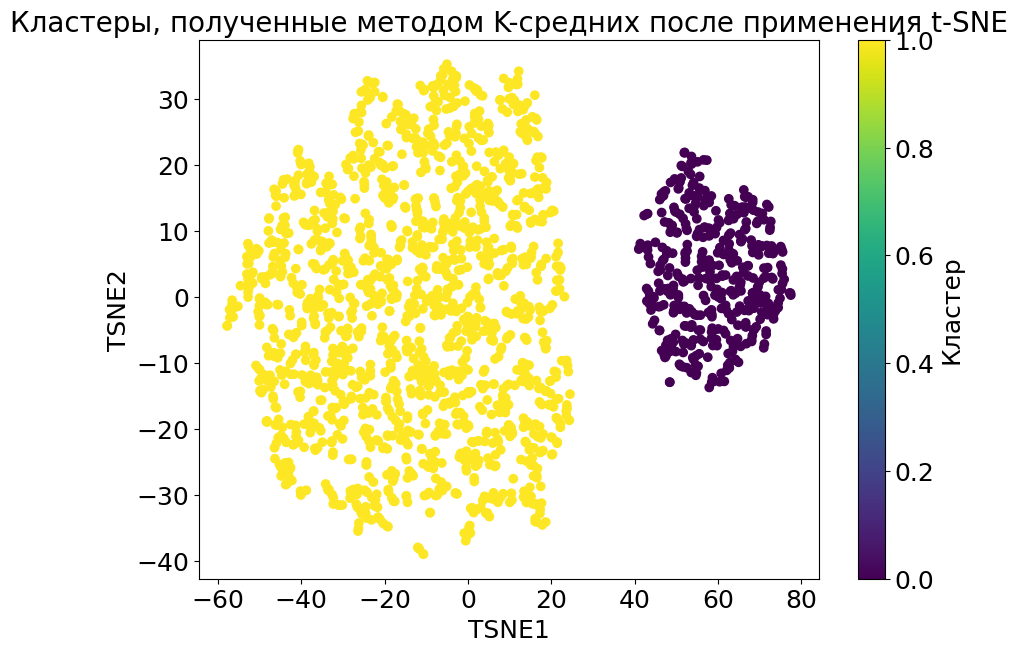

In [ ]:
# Визуализация кластеров в двумерном пространстве
plt.figure(figsize=(10, 7))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Labels'], cmap='viridis', marker='o')
plt.title('Кластеры, полученные методом K-средних после применения t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Кластер')
plt.show()

# Функция для оценки внутренних метрик качества кластеризации

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Функция для вычисления внутренних метрик
def compute_internal_metrics(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    wcss = np.sum((data - KMeans(init="k-means++", n_clusters=len(np.unique(labels)), n_init=12, random_state=42).fit(data).cluster_centers_[labels]) ** 2)

    return {
        'WCSS': wcss,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    }

In [ ]:
metrics_1 = compute_internal_metrics(cluster_dataset, labels)
data_11 = pd.DataFrame(list(metrics_1.items()), columns=['Metric', 'Value'])
data_11

,Metric,Value
0,WCSS,13543.966877
1,Silhouette Score,0.172601
2,Davies-Bouldin Index,2.124424
3,Calinski-Harabasz Index,277.596667


In [ ]:
cluster_means = df.groupby('label_k_means').mean()
cluster_means

,name_host,name_customer,gender,age,product,color,price,count
label_k_means,,,,,,,,
0,893.526442,194.338942,0.0,41.576923,4.730769,27.992788,7827.093750,2.000000
1,917.586184,196.523684,1.0,42.361842,4.518421,26.207895,7754.556579,2.010526


*   Кластер 1: Продукты, которые в основном купили женщины, с ценой выше средней.
*   Кластер 2: Продукты, которые в основном купили мужчины, с ценой ниже средней.

# Кластеризация методом DBSCAN

In [ ]:
cluster_dataset

array([[ 1.11364745,  0.14311227, -1.91150364, ..., -0.23013782,
        -1.37927816, -0.01024483],
       [-0.96953271,  0.86110742,  0.52314836, ..., -0.93501558,
        -0.11504865,  1.22937979],
       [ 0.35681542, -1.51725151, -1.91150364, ...,  0.34658034,
        -1.60649747, -1.24986945],
       ...,
       [ 1.52801298, -1.20312864, -1.91150364, ...,  0.98737831,
         0.42254755,  1.22937979],
       [-0.32433341, -1.20312864, -1.91150364, ...,  1.1796177 ,
         1.0821863 , -0.01024483],
       [-1.41795569, -0.99670503,  0.52314836, ..., -0.10197823,
        -0.45236392,  1.22937979]])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors

## Определение функции для подбора гиперпараметров DBSCAN

In [ ]:
def optimize_dbscan(data):
    best_silhouette = -1
    best_params = {'eps': None, 'min_samples': None}

    # Список параметров для поиска
    eps_values = np.arange(0.1, 2, 0.1)
    min_samples_values = range(2, 20)

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            # Проверка, чтобы не было всех меток как шум (все метки = -1)
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(data, labels)
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_params['eps'] = eps
                    best_params['min_samples'] = min_samples

    return best_params, best_silhouette

In [ ]:
# Оптимизация параметров
best_params, best_silhouette = optimize_dbscan(cluster_dataset)
print("Лучшие параметры DBSCAN: ", best_params)
print("Лучший силуэтный коэффициент: ", best_silhouette)

Лучшие параметры DBSCAN:  {'eps': 1.9000000000000001, 'min_samples': 2}
Лучший силуэтный коэффициент:  0.16548755449692115


In [ ]:
# Кластеризация с использованием лучших параметров
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels = dbscan.fit_predict(cluster_dataset)

In [ ]:
print(labels)

[0 1 0 ... 0 0 1]


In [ ]:
# Записываем метки кластеров в исходный DataFrame
df["label_DBSCAN"] = labels
df.head(5)

,name_host,name_customer,gender,age,product,color,price,count,label_k_means,label_DBSCAN
0,1501,212,0,27,4,23,1882,2,0,0
1,400,292,1,56,1,12,7279,3,1,1
2,1101,27,0,55,5,32,912,1,0,0
3,1357,113,1,54,2,31,12928,2,1,1
4,566,50,1,48,7,18,4350,1,1,1


In [ ]:
cluster_means = df.drop('label_k_means',axis=1).groupby('label_DBSCAN').mean()
cluster_means

,name_host,name_customer,gender,age,product,color,price,count
label_DBSCAN,,,,,,,,
-1,1220.500000,220.000000,0.0,48.000000,2.750000,25.000000,7453.250000,1.750000
0,890.351942,194.089806,0.0,41.514563,4.750000,28.021845,7830.723301,2.002427
1,917.586184,196.523684,1.0,42.361842,4.518421,26.207895,7754.556579,2.010526


*   Кластер 1: Продукты, которые в основном женщины, с высокой ценой и низким количеством товаров.
*   Кластер 2: Продукты, которые в основном женщины, с высокой средней ценой и средним количеством товаров.
*   Кластер 3: Продукты, которые в основном мужчины, со средней ценой и средним количеством товаров.

In [ ]:
metrics_2 = compute_internal_metrics(cluster_dataset, labels)
data_12 = pd.DataFrame(list(metrics_2.items()), columns=['Metric', 'Value'])
data_12

,Metric,Value
0,WCSS,14699.436355
1,Silhouette Score,0.165488
2,Davies-Bouldin Index,4.210809
3,Calinski-Harabasz Index,139.142212


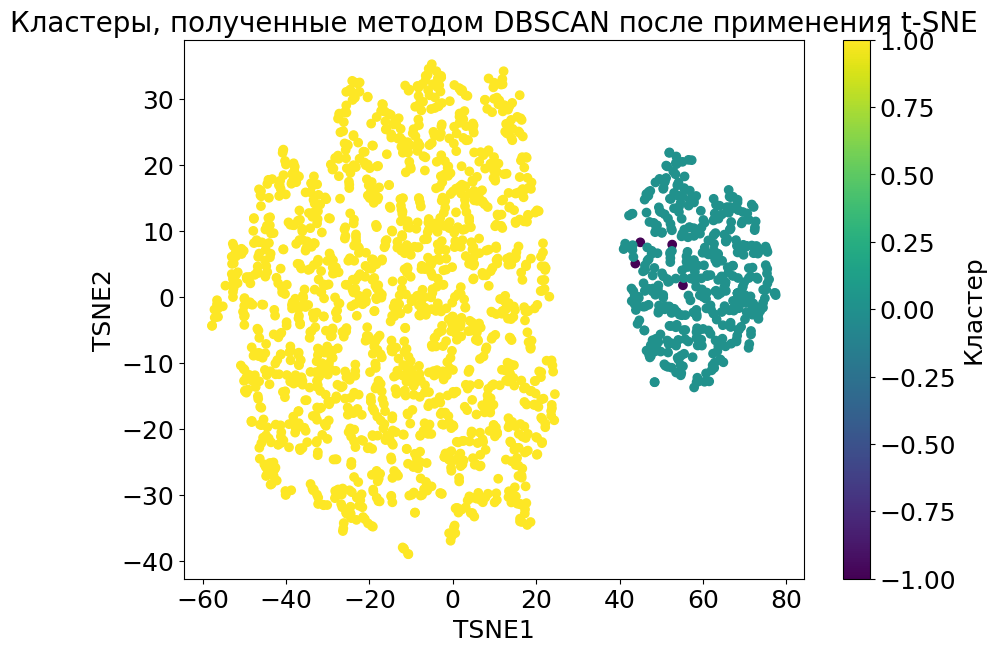

In [ ]:
# Применение t-SNE для уменьшения размерности до 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(cluster_dataset)

# Записываем результаты t-SNE в DataFrame для визуализации
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Labels'] = df['label_DBSCAN']

# Визуализация кластеров в двумерном пространстве
plt.figure(figsize=(10, 7))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Labels'], cmap='viridis', marker='o')
plt.title('Кластеры, полученные методом DBSCAN после применения t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Кластер')
plt.show()

## Clustering evaluation

In [ ]:
from IPython.display import display, HTML

# Создание DataFrame
df_2 = pd.DataFrame({
    "K_means": metrics_1,
    "DBSCAN": metrics_2
})

# Функция для форматирования значений
def format_values(value):
    if isinstance(value, float):
        return "{:.8f}".format(value)
    else:
        return value

# Применение функции к каждому элементу DataFrame
df_3 = df_2.applymap(format_values)
# Вывод DataFrame как красивой таблицы
display(HTML(df_3.to_html(escape=False)))

,K_means,DBSCAN
WCSS,13543.96687676,14699.43635504
Silhouette Score,0.17260098,0.16548755
Davies-Bouldin Index,2.12442367,4.21080949
Calinski-Harabasz Index,277.59666681,139.14221227


# Вывод: модель K-means лучше справляется с кластеризацией данных по сравнению с DBSCAN.